In [1]:
%pylab inline
import pynbody
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')

In [3]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']

In [9]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)

In [5]:
xbox=411.2170 
ybox=162.1655 
zbox=453.0553 
xc=413.621475 - xbox + 250 
yc=162.604601 - ybox + 250   
zc=448.953638 - zbox + 250
r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)

In [10]:
#selecciono mi void
rv=6
cutv0, = np.where(r0<rv)

In [11]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0=(1.0-yHe)/(1+yHe+ne0)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te0=(5./3.-1.)*u0*vv*mu0*mp/kcgs
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)


Text(0.5, 1.0, 'Into The Void')

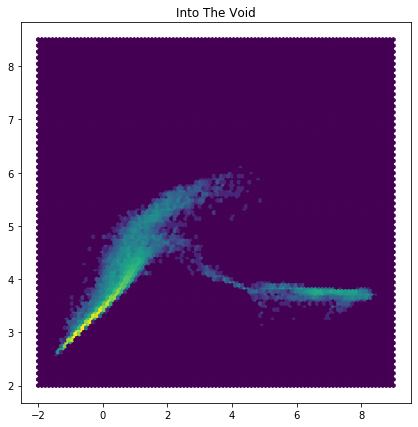

In [12]:
plt.figure(figsize=(7,7))
plt.hexbin(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),bins='log',extent=(-2,9,2,8.5))
plt.title('Into The Void')

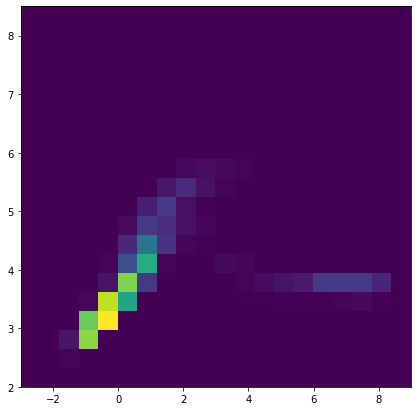

In [14]:
plt.figure(figsize=(7,7))
h=plt.hist2d(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),density='true',bins=20,range=([-3,9],[2,8.5]))

AHORA VOY A COMPARAR TODOS LOS SNAPSHOT, EN REGIONES EXTERNAR AL VOID ('UNIVERSO HOMOGENEO') PARA VER A QUE REDSHIFT TENGO UN UNIVERSO 'IGUAL' AL EL VOID

In [15]:
r2=18
r1=12
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


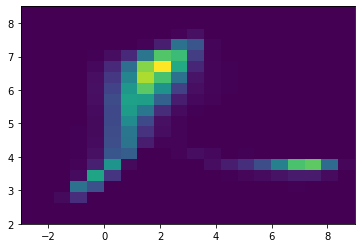

In [16]:
error=[]
z=[]
for i in range(20,50):
    x=str(i)
    print(i)
    path='/mnt/is2/dpaz/ITV/S1373/out/'
    s=pynbody.load(path+'snapshot_0'+x)
    redshift=1./s.properties['a']-1
    dens_b=dgs*(1+redshift)**3
    
    gas=s.gas
    pos=gas['pos']
    u=gas['u']
    ne=gas['ne']
    rho=gas['rho']
    
    mu=(1.0-yHe)/(1+yHe+ne)
    te=(5./3.-1.)*u*vv*mu*mp/kcgs
    r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
    cut, = np.where((r<r2) & (r>r1))
    h2=plt.hist2d(np.log10(rho[cut]/dens_b),np.log10(te[cut]),bins=20,range=([-3,9],[2,8.5]),density='true')
    
    V=np.array(h[0])
    U=np.array(h2[0])
    err=np.sum((V-U)**2)
    error.append(err)
    
    z.append(redshift)

Text(0, 0.5, 'error')

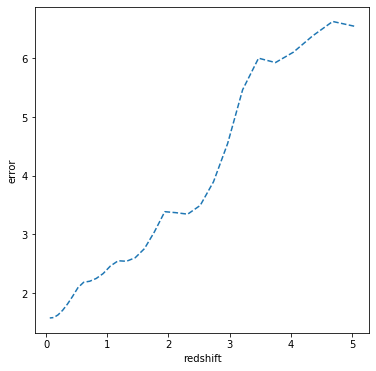

In [17]:
plt.figure(figsize=(6,6))
plt.plot(z,error,ls='--')
plt.xlabel('redshift')
plt.ylabel('error')
#plt.semilogy()

In [21]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t=pynbody.load(path+'snapshot_045')
gas=t.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho=gas['rho']
   
mu=(1.0-yHe)/(1+yHe+ne)
te=(5./3.-1.)*u*vv*mu*mp/kcgs
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut, = np.where((r<r2) & (r>r1))

redshift=1./t.properties['a']-1
dens_b=dgs*(1+redshift)**3

Text(0.5, 1.0, 'ITV')

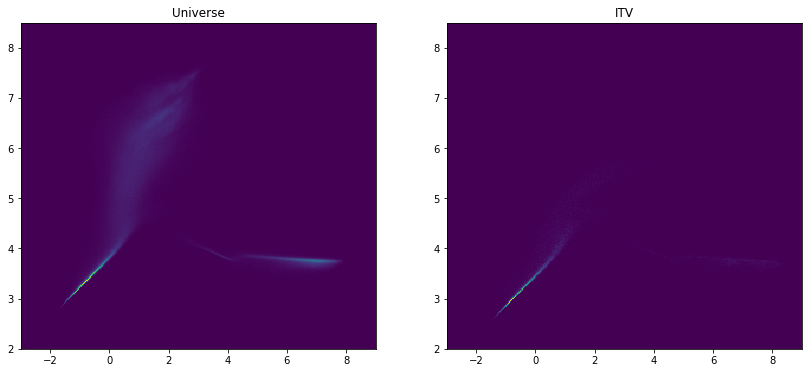

In [22]:
plt.figure(figsize(14,6))

plt.subplot(121)
h1=plt.hist2d(np.log10(rho[cut]/dens_b),np.log10(te[cut]),bins=300,range=([-3,9],[2,8.5]),density='true')
plt.title('Universe')

plt.subplot(122)
h0=plt.hist2d(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),bins=300,range=([-3,9],[2,8.5]),density='true')
plt.title('ITV')

Text(0.5, 0, '$\\delta + 1$')

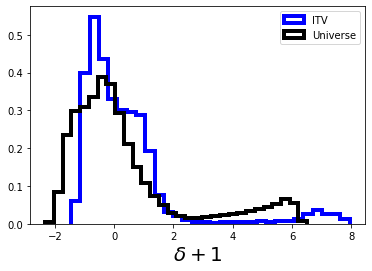

In [106]:
plt.figure(figsize=(6,4))
plt.hist(np.log10(rho0[cutv0]/dgs),histtype='step',label='ITV',density='true',bins=30,lw=4,color='blue')
plt.hist(np.log10(rho[cut]/dens_b),histtype='step',label='Universe',density='true',bins=30,lw=4,color='black')
plt.legend()
plt.xlabel(r"$\delta + 1$",size=20)

In [125]:
ks=[]
pvalue=[]
z=[]
void=np.log10(rho0[cutv0]/dgs)
randvoid=np.random.choice(void,5000)
randvoid=np.sort(randvoid)
v2void=np.arange(len(randvoid))/float(len(randvoid))
for i in range(20,50):
    x=str(i)
    print(i)
    path='/mnt/is2/dpaz/ITV/S1373/out/'
    s=pynbody.load(path+'snapshot_0'+x)
    redshift=1./s.properties['a']-1
    dens_b=dgs*(1+redshift)**3
    
    gas=s.gas
    pos=gas['pos']
    rho=gas['rho']
    r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
    cut, = np.where((r<r2) & (r>r1))
    
    univ=np.log10(rho[cut]/dens_b)
    randuniv=np.random.choice(univ,5000)
    randuniv=np.sort(randuniv)
    v2univ=np.arange(len(randuniv))/float(len(randuniv))
    v2univ_=np.interp(randuniv,randvoid,v2void)
    KS_TEST=sp.ks_2samp(v2univ_,v2void)
   
    z.append(redshift)
    ks.append(KS_TEST[0])
    pvalue.append(KS_TEST[1])

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


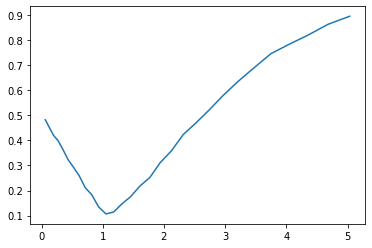

In [126]:
plt.plot(z,ks)

In [135]:
print('el maximo p value es',np.max(pvalue),'y como es menor que el nivel de significancia de alfa=0.05 se rechaza la H0')

el maximo p value es 4.717961598021151e-25 y como es menor que el nivel de significancia de alfa=0.05 se rechaza la H0


In [120]:


void=np.log10(rho0[cutv0]/dgs)
univ=np.log10(rho[cut]/dens_b)

randvoid=np.random.choice(void,5000)
randuniv=np.random.choice(univ,5000)

randvoid=np.sort(randvoid)
randuniv=np.sort(randuniv)

v2univ=np.arange(len(randuniv))/float(len(randuniv))
v2void=np.arange(len(randvoid))/float(len(randvoid))
v2univ_=np.interp(randuniv,randvoid,v2void)

In [122]:
ks=sp.ks_2samp(v2univ_,v2void)

In [124]:
ks[0]

0.1872

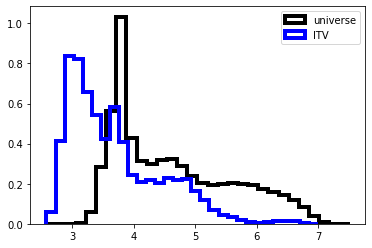

In [108]:
plt.figure(figsize=(6,4))

plt.hist(np.log10(te[cut]),histtype='step',lw=4,label='universe',color='black',density='true',bins=30)
plt.hist(np.log10(te0[cutv0]),histtype='step',lw=4,label='ITV',color='blue',density='true',bins=30)
plt.legend()

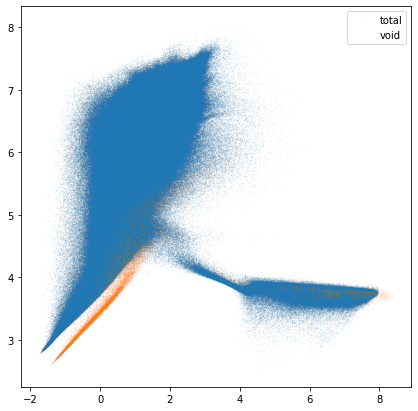

In [26]:
plt.figure(figsize=(7,7))
plt.plot(np.log10(rho[cut]/dens_b),np.log10(te[cut]),ls='none',marker='.',markersize=.05,label='total')
plt.plot(np.log10(rho0[cutv0]/dgs),np.log10(te0[cutv0]),ls='none',marker='.',markersize=.05,label='void')

plt.legend()